# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.90'

In [19]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [20]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-110-A--Spectrum--009--Spec.Data 1_CRR_Di...,104.235139,0.014351,1283.717910,0.012908,151.526101,1283.717910,450.978847,1.067749,1.876613,...,1.033654,1.014574,0.071868,0.014093,1.087983,1.085627,0.142970,0.005170,PseudoVoigtModel,PseudoVoigtModel
1,187-1-110-A--Spectrum--010--Spec.Data 1_CRR_Di...,104.221639,0.016023,1283.733077,0.014620,136.028864,1283.733077,416.182645,1.134037,1.783855,...,1.041348,1.008457,0.093780,0.016673,1.100000,1.117005,0.161306,0.005397,PseudoVoigtModel,PseudoVoigtModel
2,187-1-110-A--Spectrum--011--Spec.Data 1_CRR_Di...,104.147419,0.016130,1283.806667,0.014720,125.334859,1283.806667,372.675137,1.076490,1.903475,...,1.276408,1.209536,0.595102,0.017178,1.079914,1.069909,0.128669,0.005904,PseudoVoigtModel,PseudoVoigtModel
3,187-1-110-B--Spectrum--014--Spec.Data 1_CRR_Di...,104.198932,0.008880,1283.737612,0.008431,397.918813,1283.737612,1195.442353,1.102616,4.200964,...,1.032357,1.011013,0.071356,0.005542,1.105495,1.095827,0.169048,0.001864,PseudoVoigtModel,PseudoVoigtModel
4,187-1-110-B--Spectrum--015--Spec.Data 1,104.216279,0.008781,1283.718863,0.008365,372.706593,1283.718863,1109.593795,1.079850,3.587974,...,1.021875,1.003319,0.047243,0.005795,1.071895,1.056748,0.114321,0.001964,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [21]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'10 187-1-110-A--Spectrum--009--Information.txt'

## Now get all the important information out of the metadata files

In [22]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 35/35 [00:00<00:00, 1248.01it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-110-A--Spectrum--009--Information.txt,"January 16, 2024\n",January,16.0,6.040,60.0,5.0,100.0,"['0h', '5m', '2s']",12:58:34 PM\n,46714.0,1325.004
1,187-1-110-A--Spectrum--010--Information.txt,"January 16, 2024\n",January,16.0,6.057,60.0,5.0,100.0,"['0h', '5m', '1s']",1:03:53 PM\n,47033.0,1325.004
2,187-1-110-A--Spectrum--011--Information.txt,"January 16, 2024\n",January,16.0,6.070,60.0,5.0,100.0,"['0h', '5m', '1s']",1:09:21 PM\n,47361.0,1325.004
3,187-1-110-B--Spectrum--014--Information.txt,"January 16, 2024\n",January,16.0,6.106,60.0,5.0,100.0,"['0h', '5m', '2s']",1:41:32 PM\n,49292.0,1325.004
4,187-1-110-B--Spectrum--015--Information.txt,"January 16, 2024\n",January,16.0,6.107,60.0,5.0,100.0,"['0h', '5m', '2s']",1:47:05 PM\n,49625.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [23]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-110-A--Spectrum--009--Information'

In [24]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-110-A--Spectrum--009', '187-1-110-A--Spectrum--010',
       '187-1-110-A--Spectrum--011', '187-1-110-B--Spectrum--014',
       '187-1-110-B--Spectrum--015', '187-1-110-B--Spectrum--016',
       '187-1-110-C--Spectrum--020', '187-1-110-C--Spectrum--021',
       '187-1-110-C--Spectrum--022', '187-1-111-reg1-A--Spectrum--031',
       '187-1-111-reg1-A--Spectrum--032',
       '187-1-111-reg1-A--Spectrum--034',
       '187-1-111-reg1-A--Spectrum--036',
       '187-1-111-reg1-B--Spectrum--038',
       '187-1-111-reg1-B--Spectrum--039',
       '187-1-111-reg1-B--Spectrum--040',
       '187-1-111-reg1-C--Spectrum--043',
       '187-1-111-reg1-C--Spectrum--044',
       '187-1-111-reg1-C--Spectrum--045',
       '187-1-111-reg2-A--Spectrum--047',
       '187-1-111-reg2-A--Spectrum--048',
       '187-1-111-reg2-A--Spectrum--049',
       '187-1-111-reg2-B--Spectrum--052',
       '187-1-111-reg2-B--Spectrum--053',
       '187-1-111-reg2-B--Spectrum--054',
       '187-1-111-reg3-A--Spec

## Now get filename from spectra into same form as metadata

In [25]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-110-A--Spectrum--009--Spec.Data 1


In [26]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-110-A--Spectrum--009', '187-1-110-A--Spectrum--010',
       '187-1-110-A--Spectrum--011', '187-1-110-B--Spectrum--014',
       '187-1-110-B--Spectrum--015', '187-1-110-B--Spectrum--016',
       '187-1-110-C--Spectrum--020', '187-1-110-C--Spectrum--021',
       '187-1-110-C--Spectrum--022', '187-1-111-reg1-A--Spectrum--031',
       '187-1-111-reg1-A--Spectrum--032',
       '187-1-111-reg1-A--Spectrum--034',
       '187-1-111-reg1-A--Spectrum--036',
       '187-1-111-reg1-B--Spectrum--038',
       '187-1-111-reg1-B--Spectrum--039',
       '187-1-111-reg1-B--Spectrum--040',
       '187-1-111-reg1-C--Spectrum--043',
       '187-1-111-reg1-C--Spectrum--044',
       '187-1-111-reg2-A--Spectrum--047',
       '187-1-111-reg2-A--Spectrum--048',
       '187-1-111-reg2-A--Spectrum--049',
       '187-1-111-reg2-B--Spectrum--052',
       '187-1-111-reg2-B--Spectrum--053',
       '187-1-111-reg2-B--Spectrum--054',
       '187-1-111-reg3-A--Spectrum--060',
       '187-1-111-reg3-A--Spec

In [27]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-110-A--Spectrum--009,104.235139,0.014351,1283.717910,0.012908,151.526101,1283.717910,450.978847,1.067749,1.876613,...,January,16.0,6.040,60.0,5.0,100.0,"['0h', '5m', '2s']",12:58:34 PM\n,46714.0,1325.004
1,187-1-110-A--Spectrum--010,104.221639,0.016023,1283.733077,0.014620,136.028864,1283.733077,416.182645,1.134037,1.783855,...,January,16.0,6.057,60.0,5.0,100.0,"['0h', '5m', '1s']",1:03:53 PM\n,47033.0,1325.004
2,187-1-110-A--Spectrum--011,104.147419,0.016130,1283.806667,0.014720,125.334859,1283.806667,372.675137,1.076490,1.903475,...,January,16.0,6.070,60.0,5.0,100.0,"['0h', '5m', '1s']",1:09:21 PM\n,47361.0,1325.004
3,187-1-110-B--Spectrum--014,104.198932,0.008880,1283.737612,0.008431,397.918813,1283.737612,1195.442353,1.102616,4.200964,...,January,16.0,6.106,60.0,5.0,100.0,"['0h', '5m', '2s']",1:41:32 PM\n,49292.0,1325.004
4,187-1-110-B--Spectrum--015,104.216279,0.008781,1283.718863,0.008365,372.706593,1283.718863,1109.593795,1.079850,3.587974,...,January,16.0,6.107,60.0,5.0,100.0,"['0h', '5m', '2s']",1:47:05 PM\n,49625.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [28]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [29]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [30]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.595166962615698e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-110-A--Spectrum--009,0.534124,0.007156,0.006755,0.002360,104.008062,0.014332,0.000596,0.014351,6.040,...,46714.0,NaN,NaN,NaN,NaN,NaN,46714.0,0.997821,0.997816,0.997827
1,187-1-110-A--Spectrum--010,0.527639,0.007879,0.007518,0.002359,103.994283,0.015999,0.000595,0.016023,6.057,...,47033.0,NaN,NaN,NaN,NaN,NaN,47033.0,0.997819,0.997813,0.997824
2,187-1-110-A--Spectrum--011,0.492987,0.007806,0.007443,0.002354,103.919915,0.016106,0.000593,0.016130,6.070,...,47361.0,NaN,NaN,NaN,NaN,NaN,47361.0,0.997816,0.997810,0.997821
3,187-1-110-B--Spectrum--014,0.516066,0.004772,0.004149,0.002357,103.969583,0.008880,0.000585,0.008880,6.106,...,49292.0,1097.127641,244.820531,24.101999,Spline,0.078194,49292.0,0.997799,0.997793,0.997805
4,187-1-110-B--Spectrum--015,0.524037,0.004746,0.004119,0.002358,103.986611,0.008781,0.000583,0.008781,6.107,...,49625.0,1097.127641,268.731685,21.773877,Spline,0.092185,49625.0,0.997796,0.997791,0.997802


In [31]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.595166962615698e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-110-A--Spectrum--009,0.534124,0.007156,0.006755,0.002360,104.008062,0.014332,0.000596,0.014351,6.040,...,46714.0,NaN,NaN,NaN,NaN,NaN,46714.0,0.997821,0.997816,0.997827
1,187-1-110-A--Spectrum--010,0.527639,0.007879,0.007518,0.002359,103.994283,0.015999,0.000595,0.016023,6.057,...,47033.0,NaN,NaN,NaN,NaN,NaN,47033.0,0.997819,0.997813,0.997824
2,187-1-110-A--Spectrum--011,0.492987,0.007806,0.007443,0.002354,103.919915,0.016106,0.000593,0.016130,6.070,...,47361.0,NaN,NaN,NaN,NaN,NaN,47361.0,0.997816,0.997810,0.997821
3,187-1-110-B--Spectrum--014,0.516066,0.004772,0.004149,0.002357,103.969583,0.008880,0.000585,0.008880,6.106,...,49292.0,1097.127641,244.820531,24.101999,Spline,0.078194,49292.0,0.997799,0.997793,0.997805
4,187-1-110-B--Spectrum--015,0.524037,0.004746,0.004119,0.002358,103.986611,0.008781,0.000583,0.008781,6.107,...,49625.0,1097.127641,268.731685,21.773877,Spline,0.092185,49625.0,0.997796,0.997791,0.997802


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [32]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_January 16, 2024_fitted_2024-05-01.xlsx


## This helps visualize the errors on each spectra 

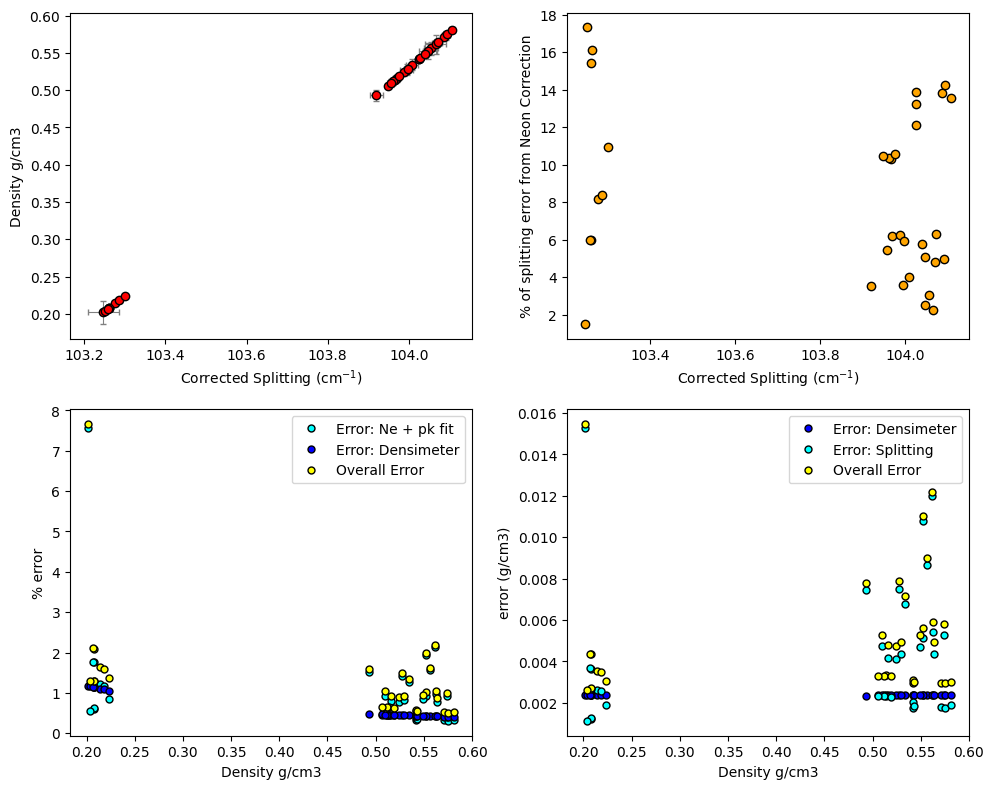

In [33]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

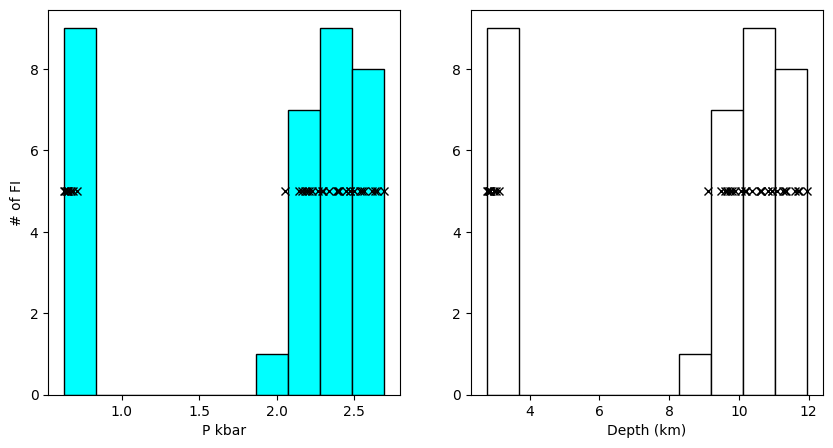

In [34]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')